## Visualize total cost by life years saved for each iteration

The experiment must be run, including `summarize.py` prior to running this notebook.

The visualization gives insight into the distribution and covariance of these key outcomes across simulation iterations. 

The outcomes are defined as `implementation - baseline` for a given FQHC. We only use two FQHCs to make the plot easier to read. 

We may convert this into a component of `summarize.py` in future experiments to avoid having a notebook as part of the experiment workflow.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker

In [4]:
df = pd.read_csv("C:/Users/KOrourke/Downloads/combined.csv")

'plt.figtext(\n    0.5,\n    0.02,\n    #"Variables are age-discounted and expressed per 1,000 unscreened and undiagnosed 40-year-olds",\n    horizontalalignment=\'center\',\n    fontsize=10,\n)'

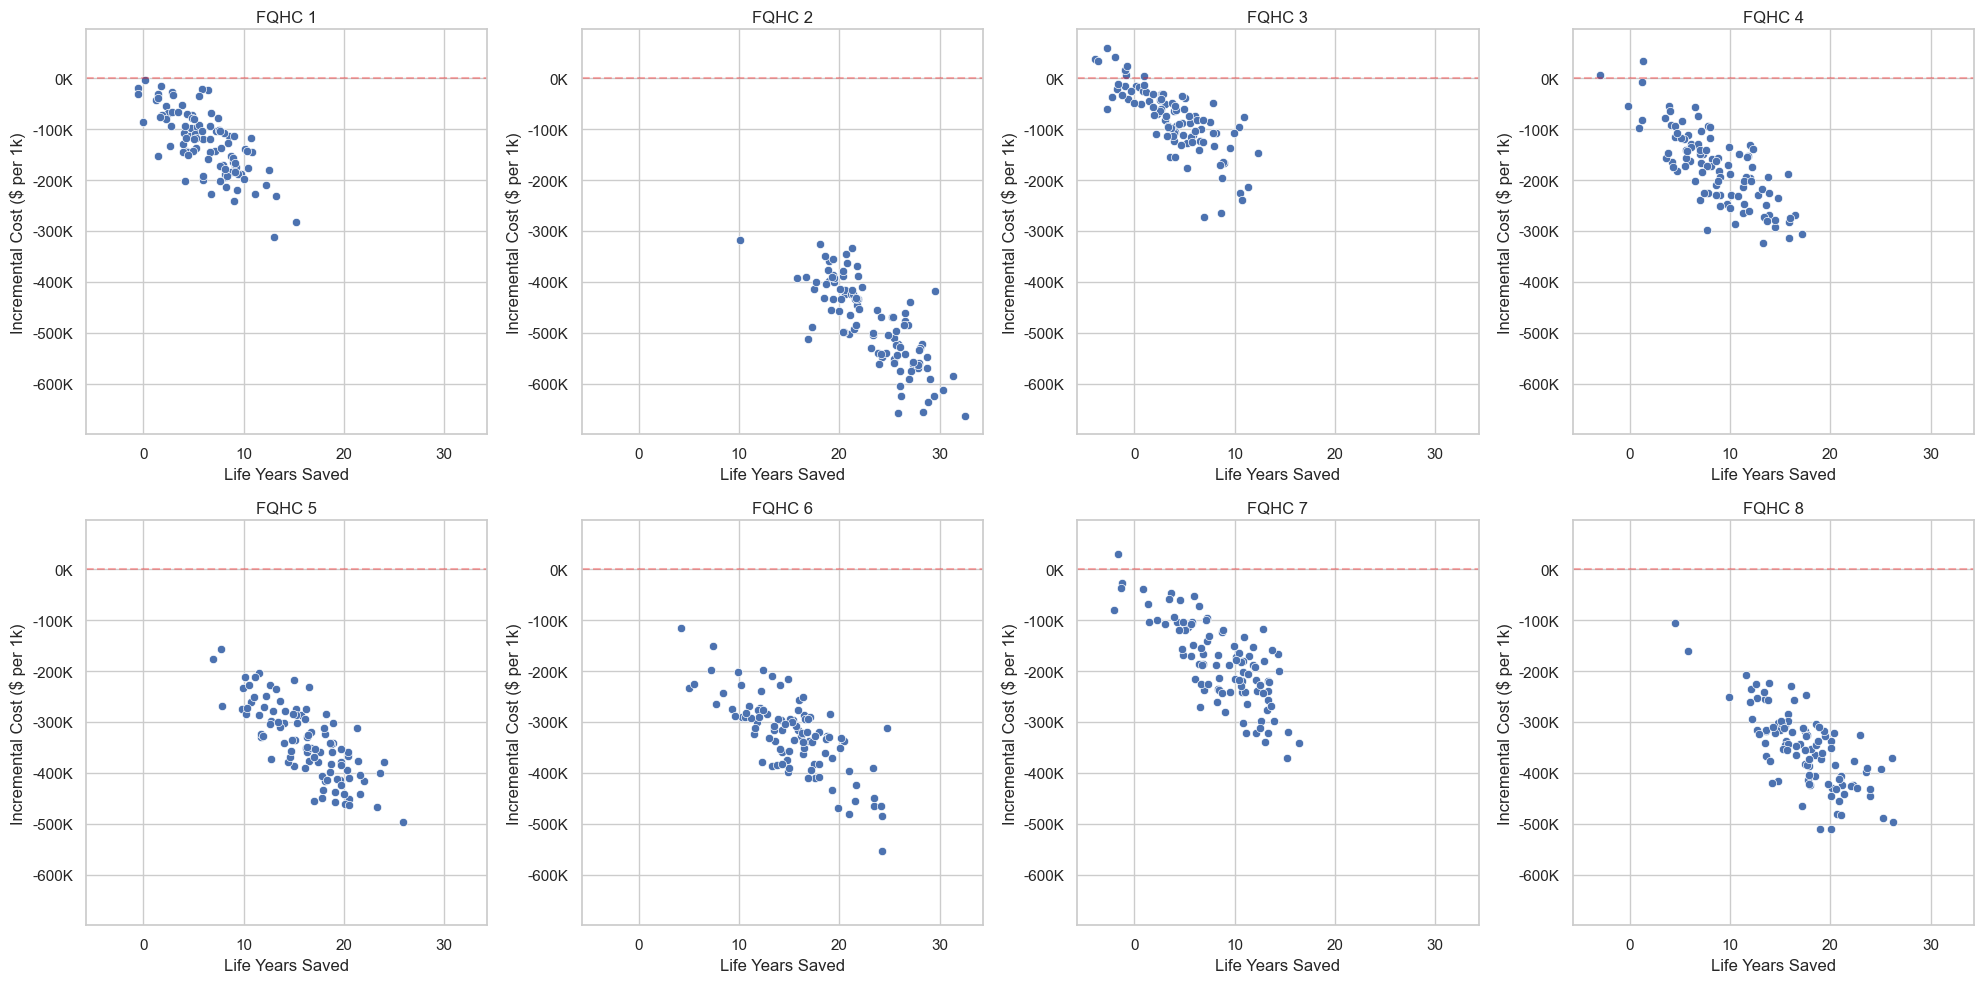

In [6]:
sns.set_theme(style="whitegrid")

# Update scenario lists for all 8 FQHCs
baseline_scenarios = [f"fqhc{i}_100Compliance_baseline" for i in range(1, 9)]
implementation_scenarios = [f"fqhc{i}_100Compliance_implementation" for i in range(1, 9)]

cost_cols = [
    "discounted_cost_routine_per_1k_40yo",
    "discounted_cost_diagnostic_per_1k_40yo",
    "discounted_cost_surveillance_per_1k_40yo",
    "discounted_cost_treatment_initial_per_1k_40yo",
    "discounted_cost_treatment_ongoing_per_1k_40yo",
    "discounted_cost_treatment_terminal_per_1k_40yo",
]

df["total_cost"] = df[cost_cols].sum(axis=1)

# Create figure with 2x4 subplots
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
# fig.suptitle('IncrementalCost vs Life Years Saved by FQHC', fontsize=16)

# Flatten axes for easier iteration
axes = axes.flatten()

# First pass to get overall min/max values
all_x = []
all_y = []
for fqhc_num in range(1, 9):
    current_baseline = df[df["scenario"] == f"fqhc{fqhc_num}_100Compliance_baseline"].sort_values(
        "iteration"
    )
    current_implementation = df[
        df["scenario"] == f"fqhc{fqhc_num}_100Compliance_implementation"
    ].sort_values("iteration")

    y = (
        current_implementation["total_cost"].to_numpy()
        - current_baseline["total_cost"].to_numpy()
    )
    x = (
        current_implementation[
            "discounted_lifeobs_if_unscreened_undiagnosed_at_40"
        ].to_numpy()
        - current_baseline[
            "discounted_lifeobs_if_unscreened_undiagnosed_at_40"
        ].to_numpy()
    ) * 1_000

    all_x.extend(x)
    all_y.extend(y)

# Get overall limits with some padding
x_min, x_max = min(all_x), max(all_x)
y_min, y_max = min(all_y), max(all_y)
x_padding = (x_max - x_min) * 0.05
y_padding = (y_max - y_min) * 0.05
x_limits = [x_min - x_padding, x_max + x_padding]
y_limits = [y_min - y_padding, y_max + y_padding]

# Second pass to create plots with consistent limits
for idx, fqhc_num in enumerate(range(1, 9)):
    current_baseline = df[df["scenario"] == f"fqhc{fqhc_num}_100Compliance_baseline"].sort_values(
        "iteration"
    )
    current_implementation = df[
        df["scenario"] == f"fqhc{fqhc_num}_100Compliance_implementation"
    ].sort_values("iteration")

    y = (
        current_implementation["total_cost"].to_numpy()
        - current_baseline["total_cost"].to_numpy()
    )
    x = (
        current_implementation[
            "discounted_lifeobs_if_unscreened_undiagnosed_at_40"
        ].to_numpy()
        - current_baseline[
            "discounted_lifeobs_if_unscreened_undiagnosed_at_40"
        ].to_numpy()
    ) * 1_000

    # Create subplot
    sns.scatterplot(x=x, y=y, ax=axes[idx])
    axes[idx].axhline(y=0, color="red", linestyle="--", alpha=0.3)
    axes[idx].set_title(f"FQHC {fqhc_num}")
    axes[idx].set_xlabel("Life Years Saved")
    axes[idx].set_ylabel("Incremental Cost ($ per 1k)")
    axes[idx].yaxis.set_major_formatter(
        ticker.FuncFormatter(lambda x, pos: "{:,.0f}".format(x / 1000) + "K")
    )

    # Set consistent limits
    axes[idx].set_xlim(x_limits)
    axes[idx].set_ylim(y_limits)

plt.tight_layout()
"""plt.figtext(
    0.5,
    0.02,
    #"Variables are age-discounted and expressed per 1,000 unscreened and undiagnosed 40-year-olds",
    horizontalalignment='center',
    fontsize=10,
)"""

'plt.figtext(\n    0.5,\n    0.02,\n    #"Variables are age-discounted and expressed per 1,000 unscreened and undiagnosed 40-year-olds",\n    horizontalalignment=\'center\',\n    fontsize=10,\n)'

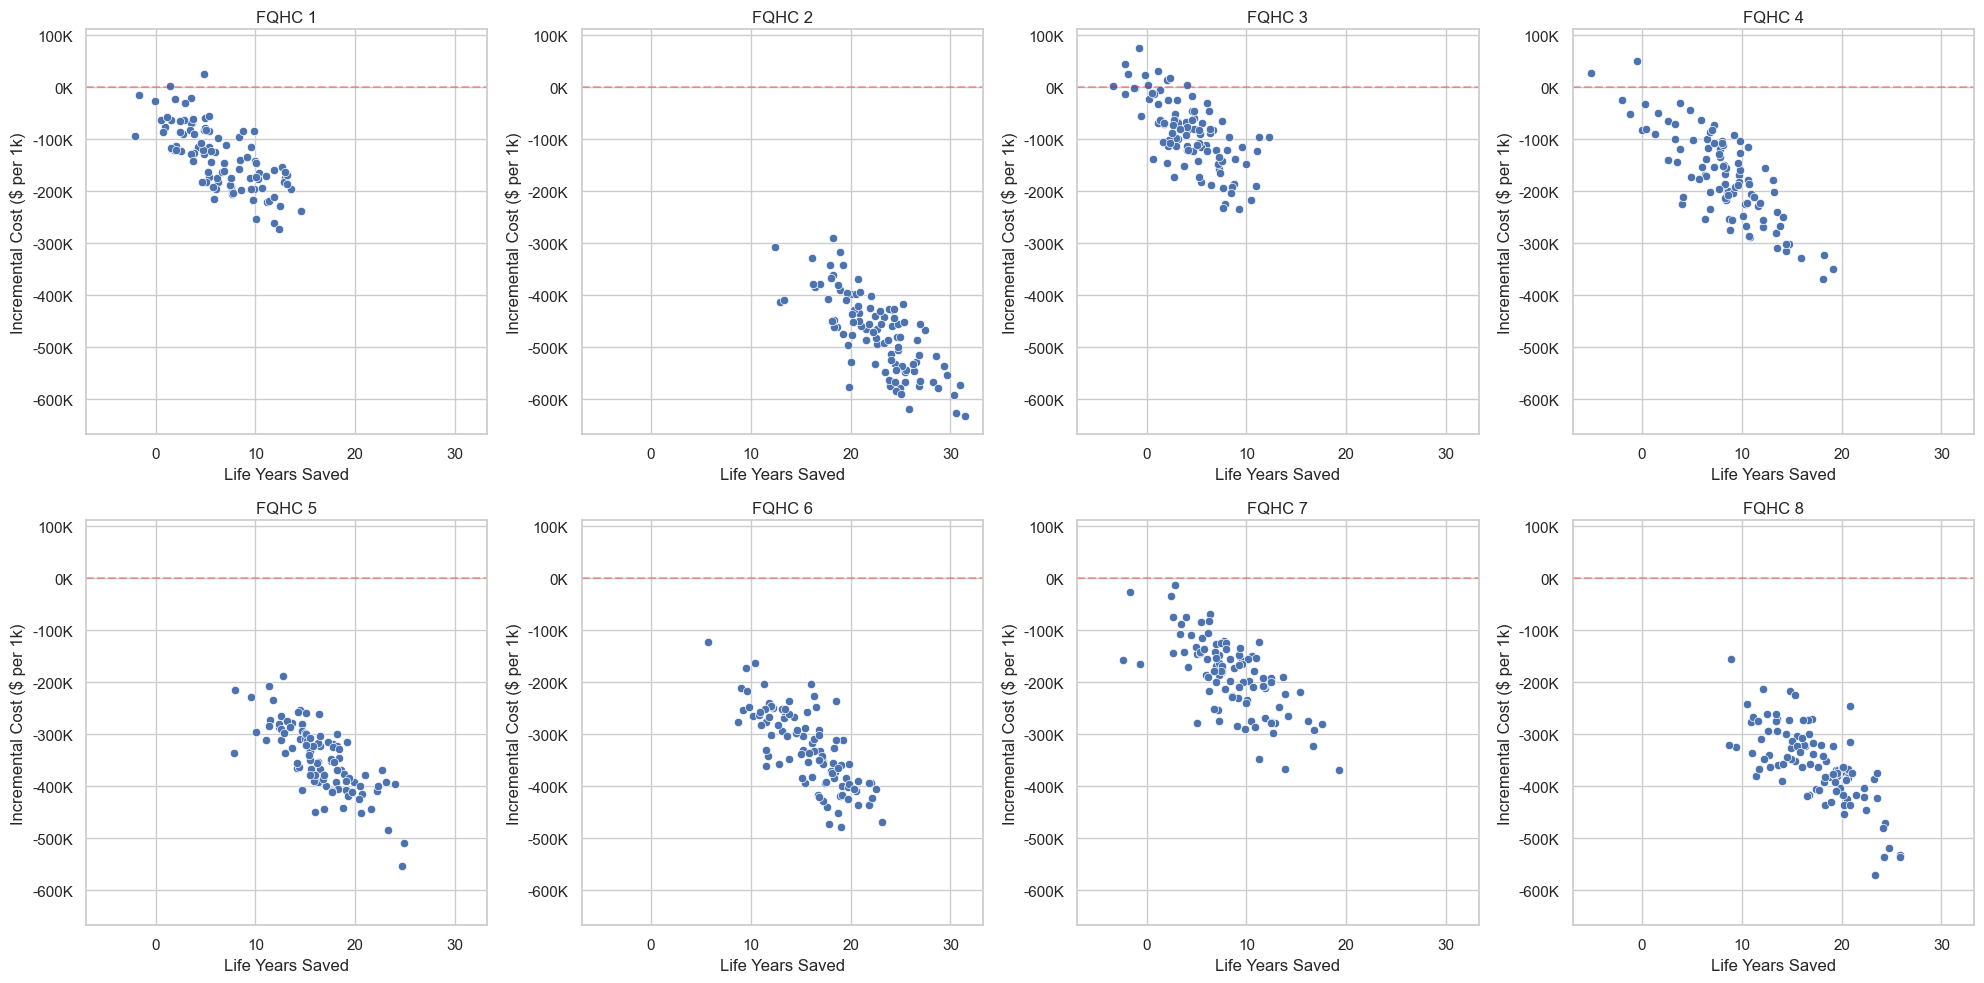

In [7]:
sns.set_theme(style="whitegrid")

# Update scenario lists for all 8 FQHCs
baseline_scenarios = [f"fqhc{i}__80Compliance_baseline" for i in range(1, 9)]
implementation_scenarios = [f"fqhc{i}_80Compliance_implementation" for i in range(1, 9)]

cost_cols = [
    "discounted_cost_routine_per_1k_40yo",
    "discounted_cost_diagnostic_per_1k_40yo",
    "discounted_cost_surveillance_per_1k_40yo",
    "discounted_cost_treatment_initial_per_1k_40yo",
    "discounted_cost_treatment_ongoing_per_1k_40yo",
    "discounted_cost_treatment_terminal_per_1k_40yo",
]

df["total_cost"] = df[cost_cols].sum(axis=1)

# Create figure with 2x4 subplots
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
# fig.suptitle('IncrementalCost vs Life Years Saved by FQHC', fontsize=16)

# Flatten axes for easier iteration
axes = axes.flatten()

# First pass to get overall min/max values
all_x = []
all_y = []
for fqhc_num in range(1, 9):
    current_baseline = df[df["scenario"] == f"fqhc{fqhc_num}_80Compliance_baseline"].sort_values(
        "iteration"
    )
    current_implementation = df[
        df["scenario"] == f"fqhc{fqhc_num}_80Compliance_implementation"
    ].sort_values("iteration")

    y = (
        current_implementation["total_cost"].to_numpy()
        - current_baseline["total_cost"].to_numpy()
    )
    x = (
        current_implementation[
            "discounted_lifeobs_if_unscreened_undiagnosed_at_40"
        ].to_numpy()
        - current_baseline[
            "discounted_lifeobs_if_unscreened_undiagnosed_at_40"
        ].to_numpy()
    ) * 1_000

    all_x.extend(x)
    all_y.extend(y)

# Get overall limits with some padding
x_min, x_max = min(all_x), max(all_x)
y_min, y_max = min(all_y), max(all_y)
x_padding = (x_max - x_min) * 0.05
y_padding = (y_max - y_min) * 0.05
x_limits = [x_min - x_padding, x_max + x_padding]
y_limits = [y_min - y_padding, y_max + y_padding]

# Second pass to create plots with consistent limits
for idx, fqhc_num in enumerate(range(1, 9)):
    current_baseline = df[df["scenario"] == f"fqhc{fqhc_num}_80Compliance_baseline"].sort_values(
        "iteration"
    )
    current_implementation = df[
        df["scenario"] == f"fqhc{fqhc_num}_80Compliance_implementation"
    ].sort_values("iteration")

    y = (
        current_implementation["total_cost"].to_numpy()
        - current_baseline["total_cost"].to_numpy()
    )
    x = (
        current_implementation[
            "discounted_lifeobs_if_unscreened_undiagnosed_at_40"
        ].to_numpy()
        - current_baseline[
            "discounted_lifeobs_if_unscreened_undiagnosed_at_40"
        ].to_numpy()
    ) * 1_000

    # Create subplot
    sns.scatterplot(x=x, y=y, ax=axes[idx])
    axes[idx].axhline(y=0, color="red", linestyle="--", alpha=0.3)
    axes[idx].set_title(f"FQHC {fqhc_num}")
    axes[idx].set_xlabel("Life Years Saved")
    axes[idx].set_ylabel("Incremental Cost ($ per 1k)")
    axes[idx].yaxis.set_major_formatter(
        ticker.FuncFormatter(lambda x, pos: "{:,.0f}".format(x / 1000) + "K")
    )

    # Set consistent limits
    axes[idx].set_xlim(x_limits)
    axes[idx].set_ylim(y_limits)

plt.tight_layout()
"""plt.figtext(
    0.5,
    0.02,
    #"Variables are age-discounted and expressed per 1,000 unscreened and undiagnosed 40-year-olds",
    horizontalalignment='center',
    fontsize=10,
)"""